# 
Predicting Wisdom in Dungeons and Dragons

# Agenda:
  - Wrangle
  - Explore
  - Model
  - Conclusion
     - Recomendations
     - Next steps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wrangle as w
import explore as e
import model as m

import os
import seaborn as sns
from math import sqrt
from scipy import stats
from pydataset import data
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.feature_selection import f_regression, SelectKBest, RFE 
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Wrangaling the data

In [2]:
# get data
df= w.get_dnd()

In [3]:
# prep data
train, val, test= w.prep_dnd(df)

Train shape: (5600, 18)

Validate shape: (2400, 18)

Test shape: (2000, 18)


# Exploration 

## Q1: Do characters who have a higher stat of height or weight have a higher wisdom stat?

In [4]:
# characters who are high in height and weight
tl_boy, tl_wis, overall= e.get_tl_boy(train)

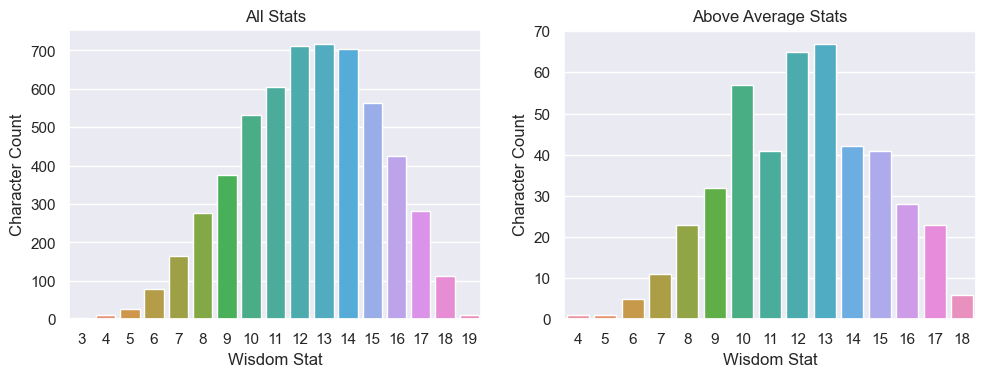

In [5]:
# plot
e.plot_above(train, tl_boy)

$H_o$: Characters who have a have greater height and weight, have a higher wisdom stat compared to the other races.

$H_a$: Characters who have a have greater height and weight, do not a higher wisdom stat compared to the other races.


In [6]:
# stats test
e.the_t(train, tl_wis)

We fail to reject the Null Hypothesis


## Takeawakys: 
  - Based on the graph we are not able to clearly tell apart which group has a greater wisdom. However, based on the results from our statistical testing, we are able to see that charcters who have a high height and weight count, do have a higher wisdom.

## Q2: Do characters having above average stats have higher wisdom?

In [7]:
# gets above average stats
above_df, above_wis, overall= e.get_above(train)

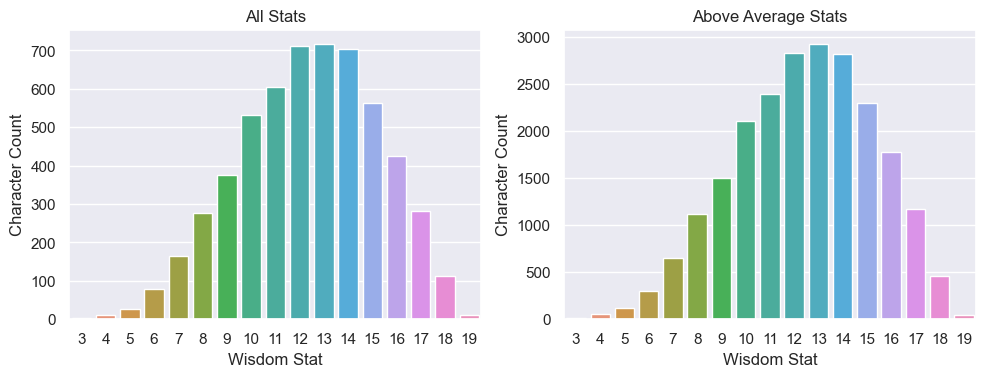

In [8]:
# plot
e.plot_above(train, above_df)

$H_o$: The characters who have above average stats have equal, or less, wisdom stats.

$H_a$: The characters who have above average stats have higher wisdom stats.

In [9]:
# stats test
e.test_above(above_wis, overall)

We reject the Null Hypothesis


## Takeaways:
  - Both the graph show and the statistical testing show us that characters with above average stats have a higher wisdom.

## Q3: Do characters having both high intelligence and dexterity have greater wisdom?

In [10]:
# gets the charcaters wwith higher than 16 dexterity and intelligence
big_brain= e.get_big(train)

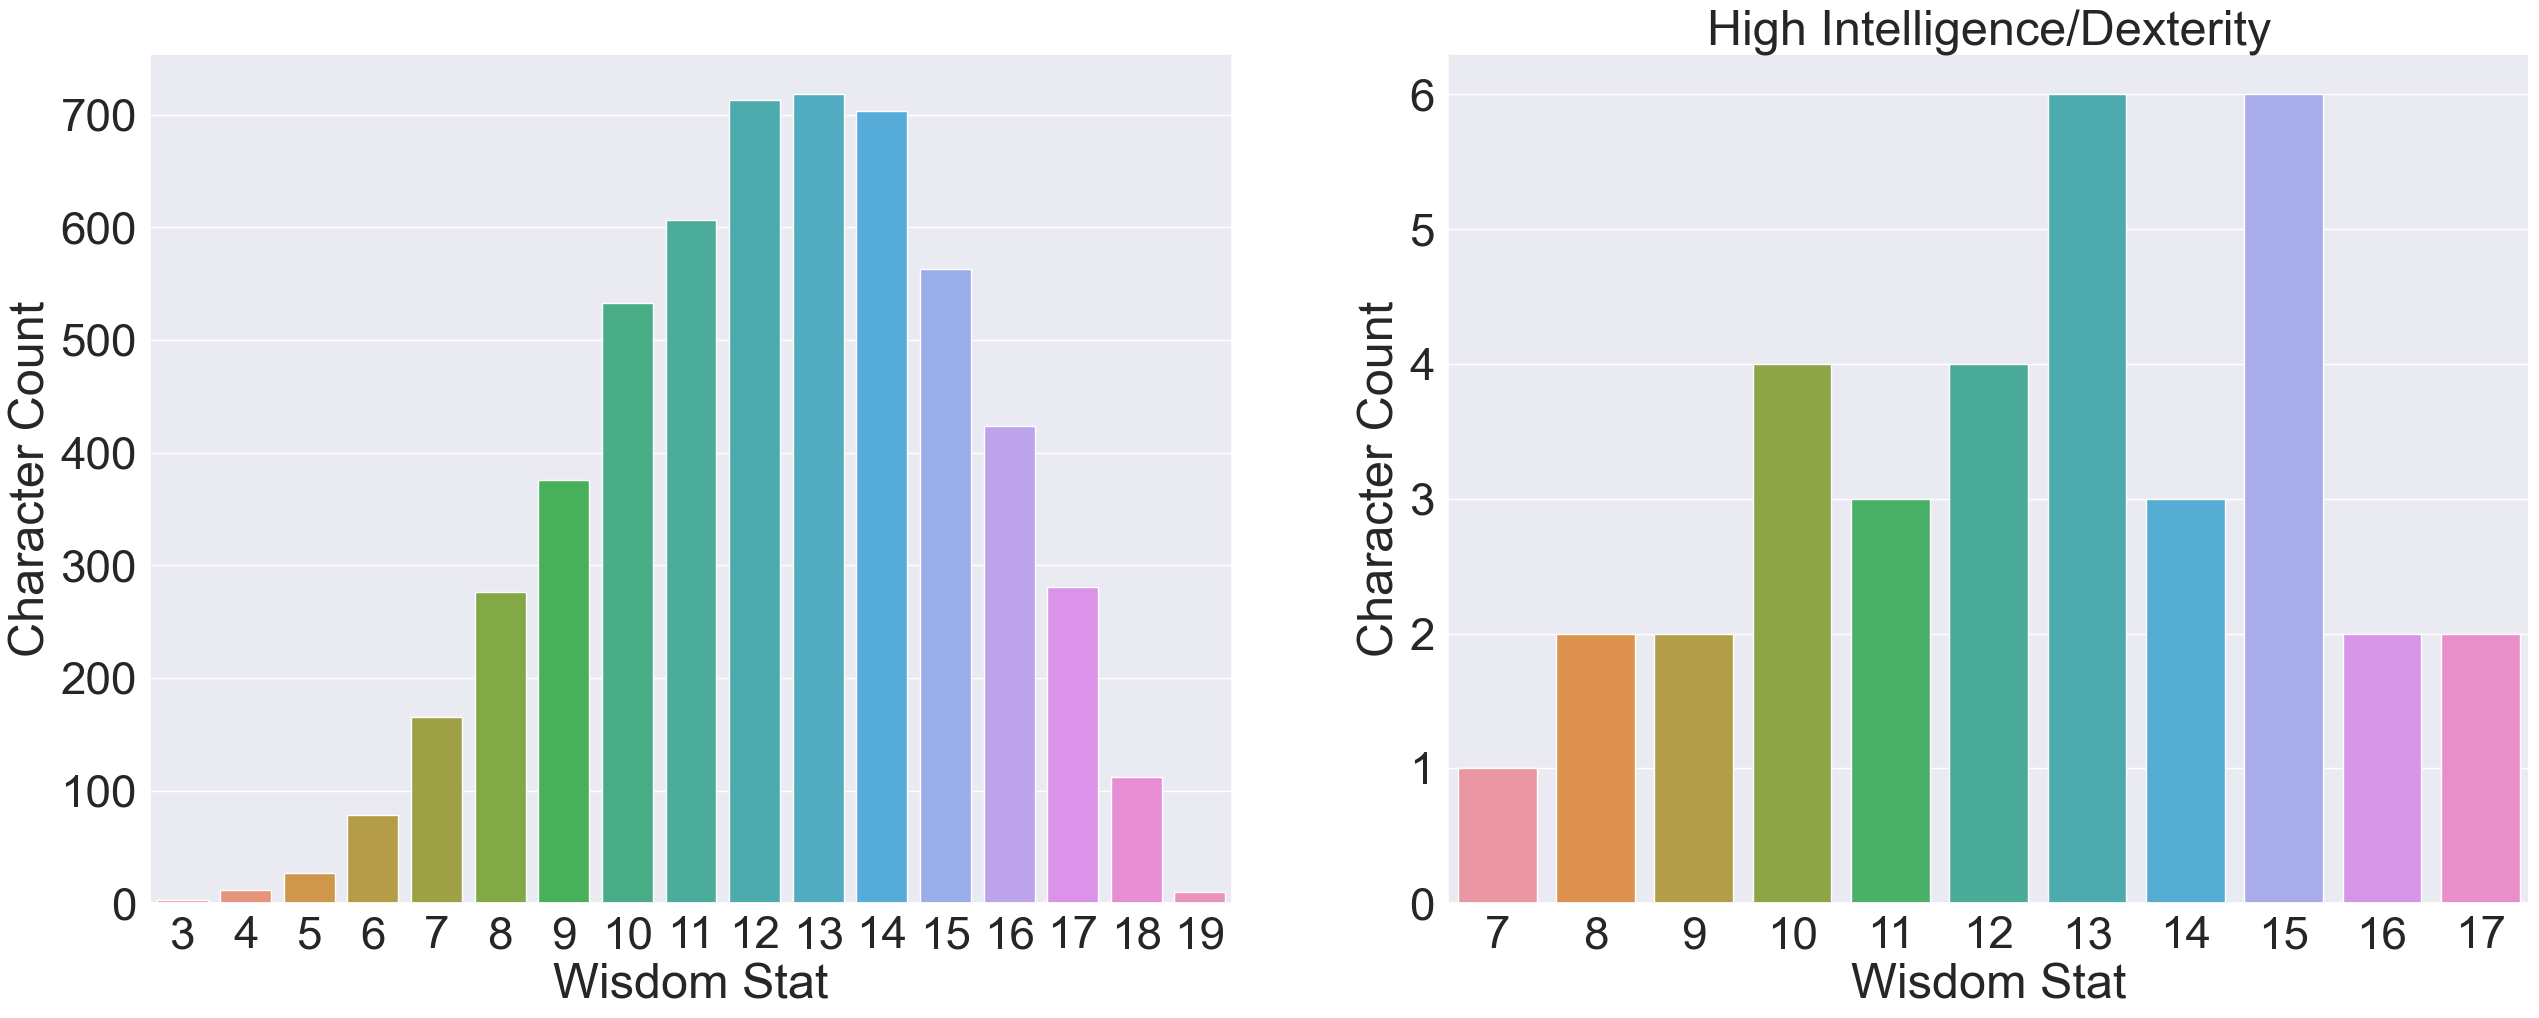

In [12]:
# plot
e.plot_big_brain(train, big_brain)

## Q4: Does being a certain race mean higher wisdom?

In [13]:
# gets average wisdom for each race
wis_mean= e.get_avg(train)

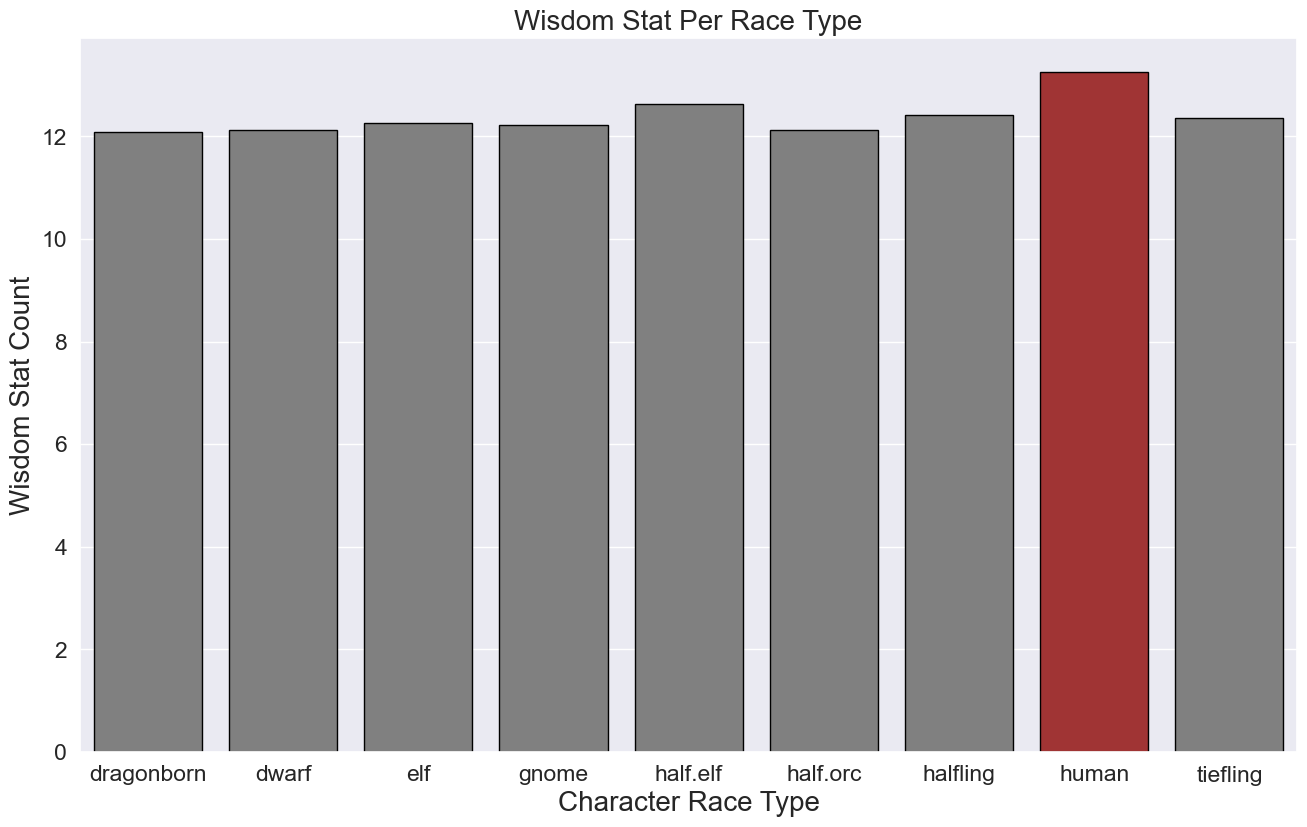

In [14]:
# plot
e.wis_per_race(wis_mean)

# Takeaways:
  - We can see from the graph that on average, humans tend to have a higher wisdom stat level compared to the other races.

<div class="alert alert-info">
    <header>
    <h2>Exploration Summary:</h2>
    </header>
    <dl>
        <dt> </dt>
        <dt>Takeaways:</dt>
        <dd>- Race,Intelligenc, and Dexterity were found to be drivers of wisdom. So
        they will be used in our prediction models.</dd>
        

</div>

# Modeling 

In [15]:
# makes clusters
clusters= m.clustering(train, 'charisma', 'constitution')

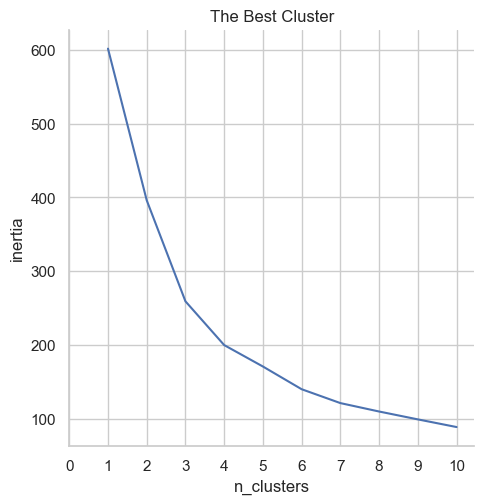

In [19]:
# shows optimal number of clusters
m.best_cluster(df, 'charisma', 'constitution')

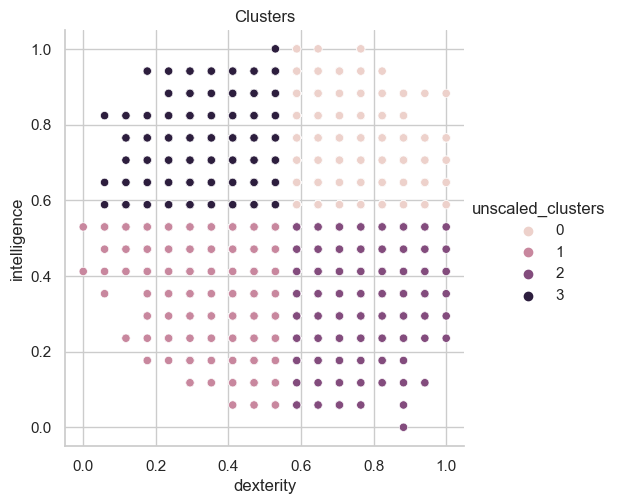

In [20]:
# plot clusters
m.cluster_relplot(train, 'dexterity', 'intelligence')

In [21]:
# combine df with clusters
df= m.combined_df(df, 'dexterity', 'intelligence')

In [22]:
# split data
train, val, test= w.new_split(df)

In [23]:
# drop column
df.drop(columns= ['race'], inplace= True)

In [24]:
# resplit data
train, val, test= w.new_split(df)

In [26]:
# scale and split data
train_scaled, val_scaled, test_scaled= m.mvp_scaled_data(df, train, val, test)

In [27]:
# show how scaled data looks like
train_scaled.head()

,height,weight,speed,strength,dexterity,constitution,intelligence,wisdom,charisma,race_dwarf,race_elf,race_gnome,race_half_elf,race_half_orc,race_halfling,race_human,race_tiefling,scaled_clusters
4099,0.142857,0.000000,0.0,0.352941,0.470588,0.705882,0.117647,16,0.705882,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
9839,0.530612,0.280130,1.0,0.705882,0.529412,0.529412,0.588235,9,0.764706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2558,0.551020,0.273616,1.0,0.470588,0.705882,0.588235,0.647059,15,0.352941,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7552,0.061224,0.000000,0.0,0.529412,0.588235,0.764706,0.470588,15,0.352941,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3
8851,0.795918,0.449511,1.0,0.647059,0.294118,0.764706,0.705882,14,0.470588,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [28]:
# resplit data
train, val, test= w.new_split(df)

In [30]:
X_train_scaled, y_train_unscaled, X_val_scaled, y_val_unscaled, X_test_scaled, y_test_unscaled= m.splitting_subsets(train_scaled, val_scaled, test_scaled, target= 'wisdom')

In [31]:
# get baseline
m.baseline(y_train)

2.8632478915595847

In [32]:
# get lasso_lars model
m.lasso_lars(X_train_scaled, y_train_unscaled)

,alpha,lasso_rmse
0,0.05,2.863248
16,0.85,2.863248
15,0.80,2.863248
14,0.75,2.863248
13,0.70,2.863248
12,0.65,2.863248
11,0.60,2.863248
10,0.55,2.863248
17,0.90,2.863248
9,0.50,2.863248


In [33]:
# get linear model
m.linear_model(X_train_scaled, y_train_unscaled)

,model,linear_rmse
0,linear,2.840606


In [34]:
# get tweedie model
m.tweedie_models(X_train_scaled, y_train_unscaled)

,power,tweedie_rmse
1,1,2.845406
0,0,2.858832
2,2,2.858833
3,3,2.862818


In [35]:
# get linear poly model
m.linear_poly(X_train, y_train)

,degree,poly_rmse
1,3,2.707038
0,2,2.814235


In [36]:
# validate the used models on validate data
m.validate_models(X_train_scaled, y_train_unscaled, X_val_scaled, y_val_unscaled)

(2.8781548878529244, 2.8990045591717584, 2.8781548878529244)

In [38]:
# make dataframe of the best models
best_mods= m.best_models(X_train_scaled, y_train_unscaled, X_val_scaled, y_val_unscaled)

In [39]:
# show best models
best_mods

,model,train_rmse,validate_rmse,difference
0,linear_poly,2.809043,2.878155,-0.069112
1,linear,2.840606,2.878155,-0.037549
2,lasso_lars,2.863248,2.899005,-0.035757
3,baseline,2.863248,2.863248,0.000000


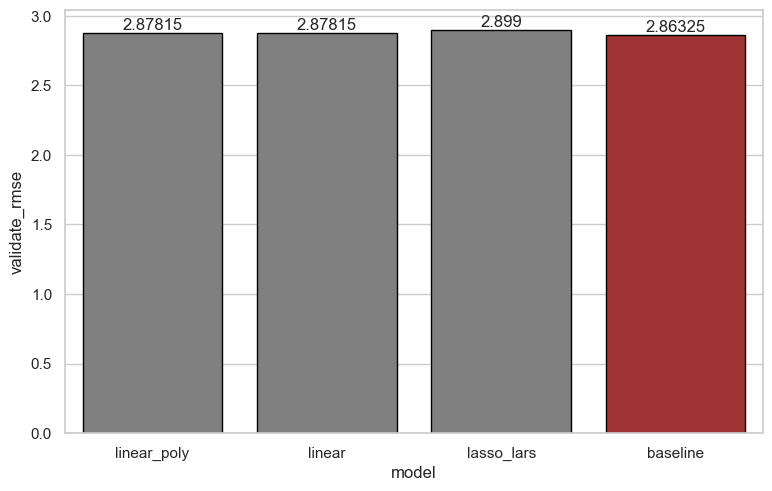

In [47]:
# plot
m.plot_model(best_mods)

In [37]:
# test best model
m.test_model(X_train_scaled, y_train_unscaled, X_test_scaled, y_test_unscaled)

2.8406059076248216

In [45]:
# making dataframe of the best model used on test
test_mod= m.best_model(X_train, y_train, X_val, y_val, X_test, y_test)

<div class="alert alert-info">
    <header>
    <h2>Modeling Conclusion:</h2>
    </header>
    <dl>
        <dt> Multiple models were made, but nothing beat the baseline predictions</dt>
        <dt> Next Step:</dt>
        <dd>- Although nothing beat the baseline, I used my linear model for my test phase</dd>
    </dl>
</div>

In [46]:
# show dataframe
test_mod

,model,train_rmse,validate_rmse,difference,test_rmse
1,linear,2.840135,2.877213,-0.037078,2.945788


<div class="alert alert-info">
    <header>
    <h2>Conclusion:</h2>
    </header>
    <dl>
        <dt> None of my models were able to beat the baseline predictions</dt>
        <dt>Recommendations:</dt>
        <dd>- Wisdom is something that cannot be easily predicted, so lets not waste money on it.</dd>
        <dt> Next Steps:</dt>
        <dd>- Use different models such as XGboost</dd>
        <dd>- Add more races to the data set.</dd>
    </dl>
</div>